# Overlap matrices

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# Load data
emle = np.load("data_methylpentanoate/emle.npy", allow_pickle=True).item()
ml_mm_vacuum = np.load(
    "data_methylpentanoate/ml_mm_vacuum.npy", allow_pickle=True
).item()
ml_mm = np.load("data_methylpentanoate/ml_mm.npy", allow_pickle=True).item()
mm_sol = np.load("data_methylpentanoate/mm_sol.npy", allow_pickle=True).item()

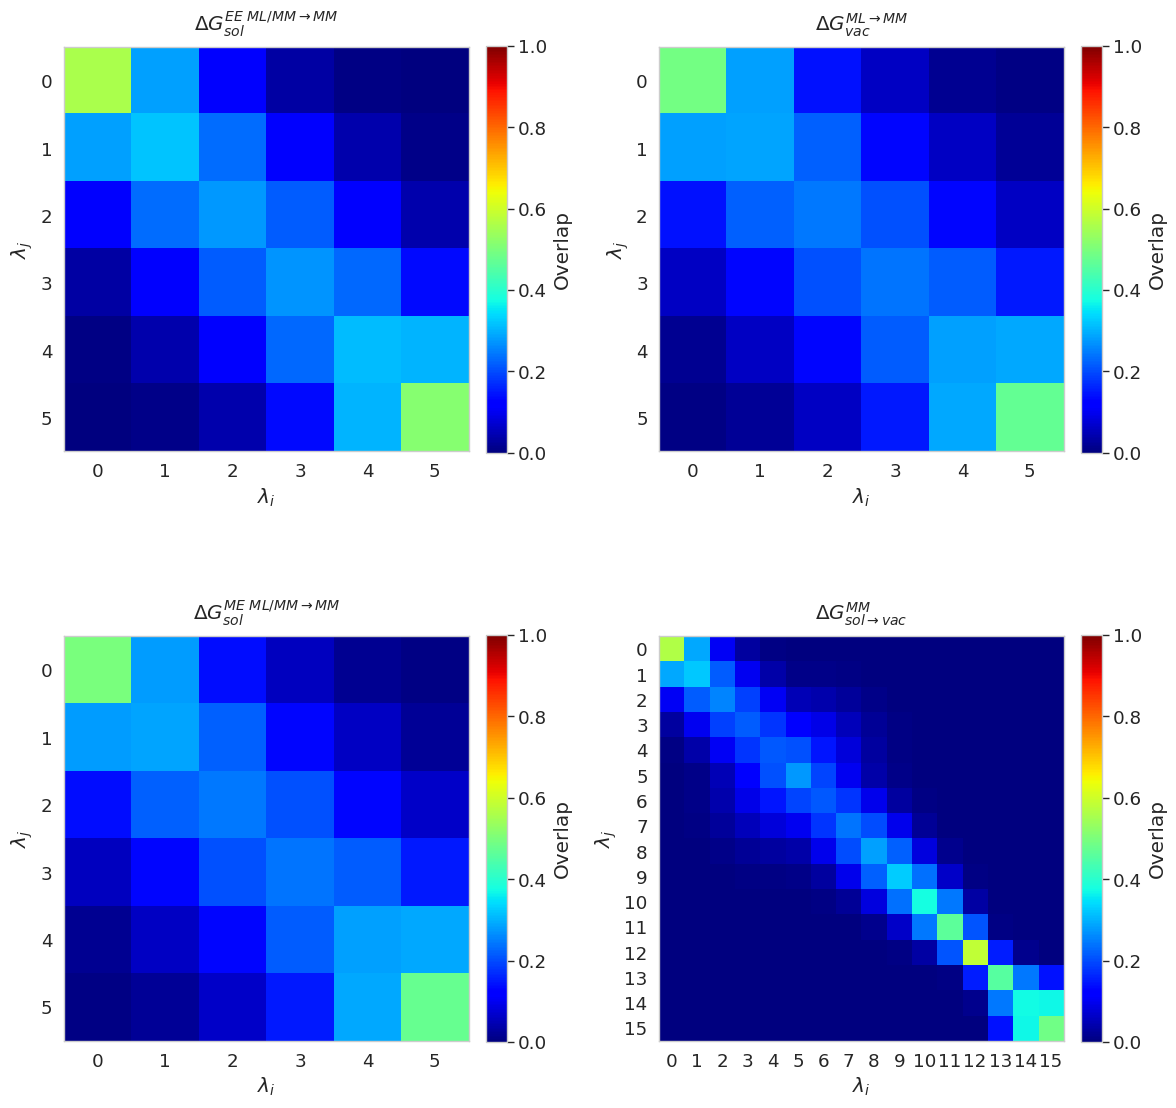

In [4]:
sns.set(style="whitegrid", palette="colorblind", context="paper", font_scale=1.5)

matrices = [
    (r"$\Delta G_{sol}^{EE\ ML/MM \rightarrow MM}$", emle["matrix"]),
    (r"$\Delta G_{vac}^{ML\rightarrow MM}$", ml_mm_vacuum["matrix"]),
    (r"$\Delta G_{sol}^{ME\ ML/MM \rightarrow MM}$", ml_mm["matrix"]),
    (r"$\Delta G_{sol \rightarrow vac}^{MM}$", mm_sol["matrix"]),
]
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False, sharey=False)
axes_flat = axes.flat
vmin = 0
vmax = 1
ims = []
for ax, (title, matrix) in zip(axes_flat, matrices):
    im = ax.imshow(matrix, cmap="jet", vmin=vmin, vmax=vmax)
    ax.set_title(title, pad=12)
    ax.set_xlabel(r"$\lambda_i$")
    ax.set_ylabel(r"$\lambda_j$")
    ax.set_xticks(np.arange(0, len(matrix), 1))
    ax.set_yticks(np.arange(0, len(matrix), 1))
    ax.grid(False)
    ims.append(im)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Overlap")


plt.tight_layout()
plt.savefig("overlap_matrices.pdf", bbox_inches="tight", dpi=300, transparent=True)